<a href="https://colab.research.google.com/github/caleb-stewart/A-Z_Machine-Learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# This data set is only features.
# We only select annual income and a customers spending score
# Find clusters corresponding the income and customer spending
#   We do this so we can visualize our data
# We are creating a dependent variable
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

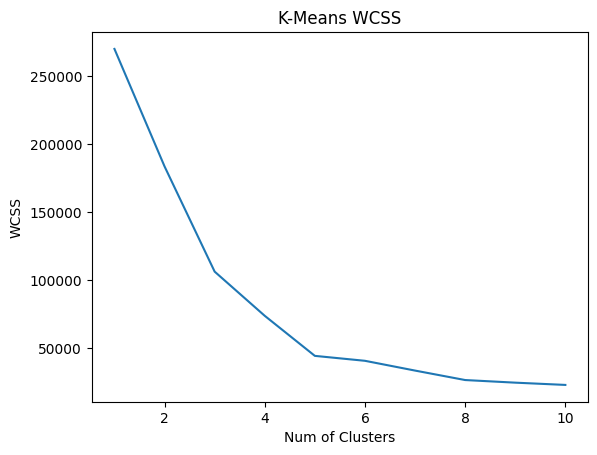

In [9]:
from sklearn.cluster import KMeans
# We will implement the wcss method
# Run K-Means several times, each time with a different number of clusters
wcss = []
# Test 10 k-means clusters
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Now we need to plot the graph
plt.plot(range(1, 11), wcss)
plt.title("K-Means WCSS")
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()

# It seems that the elbow is at 5

## Training the K-Means model on the dataset

In [11]:
# train a new Kmeans model with the optimal number of clusters
cluster = KMeans(n_clusters=5, init='k-means++', random_state=42)
# Trains, and also returns thr groups (dependent variable)
y = cluster.fit_predict(X)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

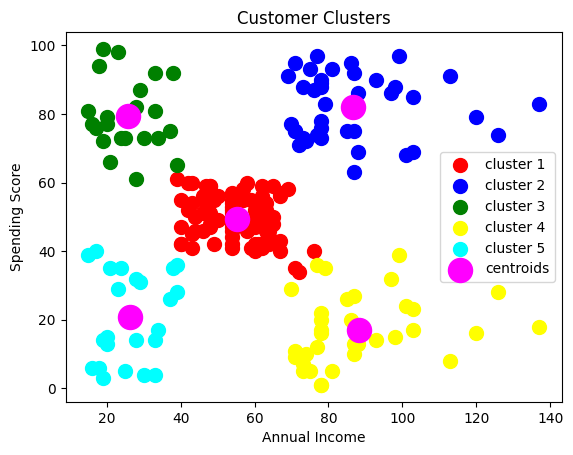

In [26]:
# Plot all customers who are in group 0
plt.scatter(X[y == 0,0], X[y == 0, 1], s=100, color='red', label='cluster 1')
plt.scatter(X[y == 1,0], X[y == 1, 1], s=100, color='blue', label='cluster 2')
plt.scatter(X[y == 2,0], X[y == 2, 1], s=100, color='green', label='cluster 3')
plt.scatter(X[y == 3,0], X[y == 3, 1], s=100, color='yellow', label='cluster 4')
plt.scatter(X[y == 4,0], X[y == 4, 1], s=100, color='cyan', label='cluster 5')
# Add the centers to the plot
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s =  300, color='magenta', label='centroids')

plt.title("Customer Clusters")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()